<a href="https://colab.research.google.com/github/dourivaljunior/Curso-de-Data-Science/blob/main/estudo_pre_aula_04_DS_Full_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Abrindo o arquivo.

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving dados_loja.csv to dados_loja.csv


In [ ]:
df = pd.read_csv('dados_loja.csv') 

# Obtendo informações do dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     6 non-null      object
 1   produto  6 non-null      object
 2   valor    6 non-null      int64 
 3   cidade   6 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [ ]:
df.head(6)

,data,produto,valor,cidade
0,2022-05-22,laptop,5000,salvador
1,2022-05-22,celular,1000,salvador
2,2022-05-23,laptop,5000,rio
3,2022-05-23,laptop,5000,rio
4,2022-05-24,bike,1000,recife
5,2022-05-24,celular,1000,recife


# Determinando quantos produtos foram vendidos.

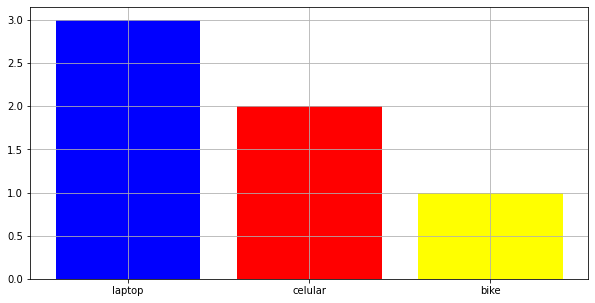

In [ ]:
x1=df['produto'].value_counts().index
y1=df['produto'].value_counts()
fig = plt.figure(figsize =(10, 5)) 
paleta_de_cores=['blue','red','yellow']
plt.bar(x1,y1,color=paleta_de_cores)
plt.grid()
plt.show()

# Trabalhando com data.

In [ ]:
df['data']=pd.to_datetime(df['data'])
df['dia'] = df['data'].dt.day
print(df['dia'])

0    22
1    22
2    23
3    23
4    24
5    24
Name: dia, dtype: int64


# Agrupando as vendas por dia.

In [ ]:
df2=df.groupby(df['dia']).agg({'valor':'sum'}).reset_index()
print(df2)

   dia  valor
0   22   6000
1   23  10000
2   24   2000


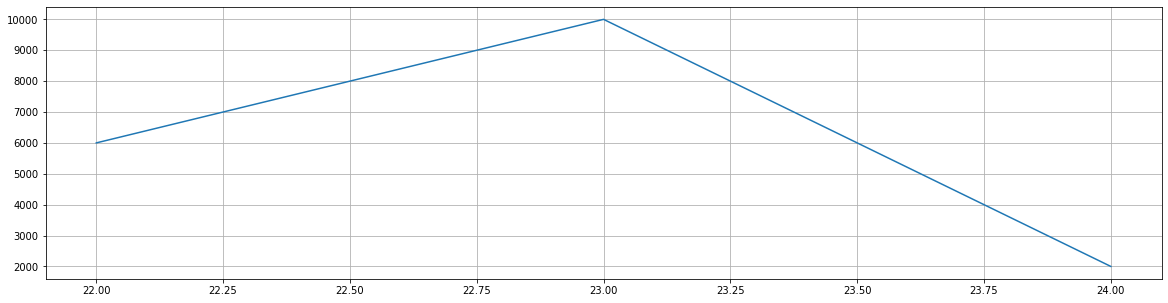

In [ ]:
x2=df2['dia']
y2=df2['valor']
plt.figure(figsize = (20,5))
plt.plot(x2,y2)
plt.grid()
plt.show()

# Agregando por cidade.

In [ ]:
df3=df.groupby(df['cidade']).agg({'valor':'mean'}).reset_index()
print(df3)

     cidade   valor
0    recife  1000.0
1       rio  5000.0
2  salvador  3000.0


# Ranking de compras.

In [ ]:
df4=df.groupby(['cidade'])['valor'].sum().sort_values(ascending=False)
print(df4)

cidade
rio         10000
salvador     6000
recife       2000
Name: valor, dtype: int64
